2024-04-04

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../src/')

In [2]:
path = 'D:/data/Graduation/OBS/for_ridge/'

## 全年

In [3]:
df = pd.read_excel(path + 'O3_years.xlsx',index_col=0)
mda8 = df.rolling(8).mean().resample('D').max()
mda8.dropna(inplace=True)
mda8['year']=mda8.index.year
mda8

,广州,深圳,珠海,佛山,中山,江门,东莞,惠州,肇庆,avg,year
datetime,,,,,,,,,,,
2014-05-13,49.875,33.375,39.875,48.500,19.750,28.750,57.000,38.625,66.000,41.458333,2014
2014-05-14,64.500,35.000,40.125,50.250,30.375,31.000,59.500,38.625,66.500,45.944444,2014
2014-05-15,82.500,37.625,48.000,74.500,45.500,35.750,66.875,60.250,98.375,60.527778,2014
2014-05-16,75.375,36.250,48.625,63.875,47.500,33.000,57.750,57.125,98.000,56.250000,2014
2014-05-17,44.875,32.000,45.875,48.750,44.750,30.375,56.000,44.750,66.125,42.458333,2014
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,185.500,132.625,147.125,170.375,168.750,159.500,203.500,130.125,134.000,159.055556,2023
2023-05-17,100.500,83.875,102.750,101.250,101.625,100.125,94.875,88.875,87.500,95.708333,2023
2023-05-18,146.500,81.500,82.625,128.750,116.500,107.750,145.375,113.750,114.250,115.027778,2023


In [4]:
mda8_df = mda8.loc['2014':'2022']

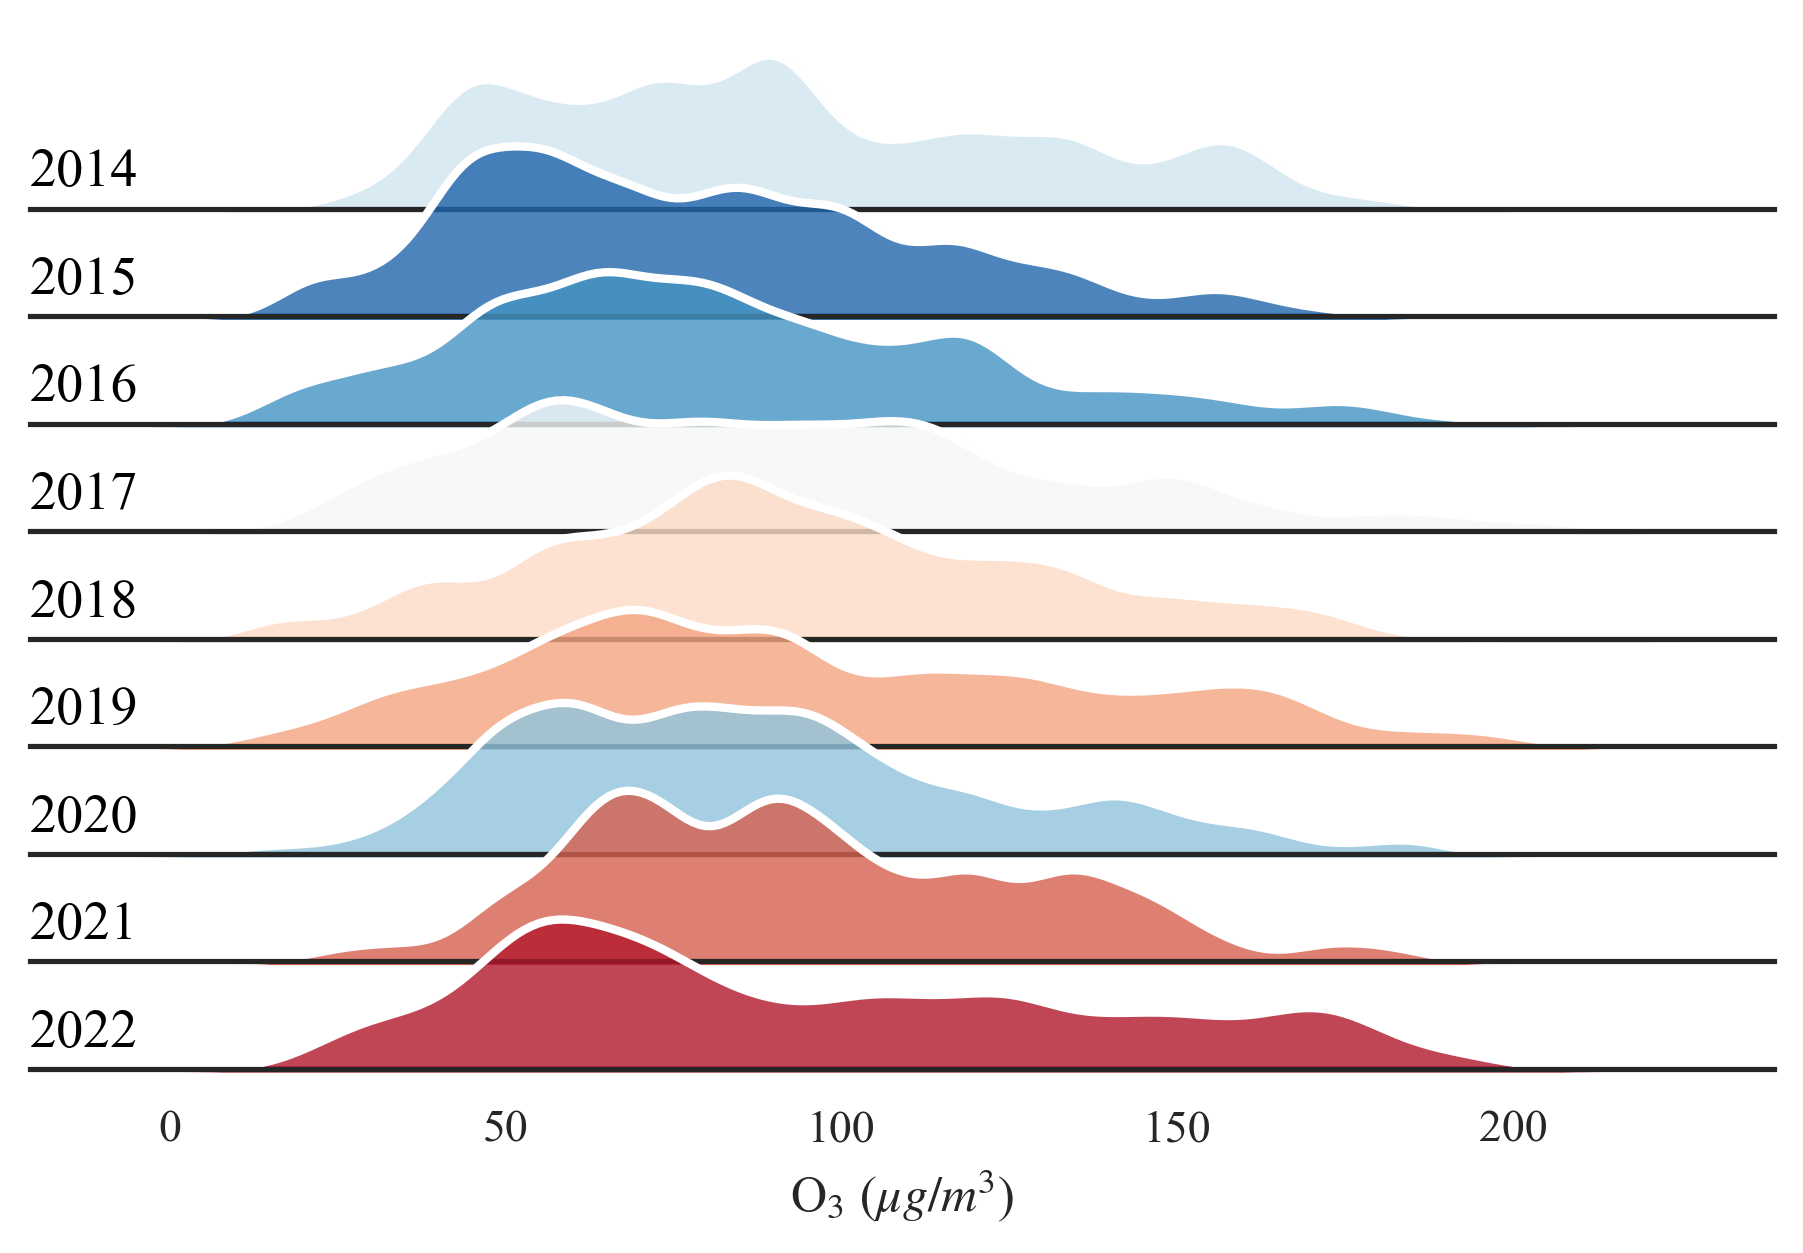

In [5]:
# 设置样式
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font='Times New Roman')
plt.rcParams['figure.dpi'] = 300
usepalette = 'RdBu_r'

# 指定颜色顺序
hue_order = mda8_df.groupby('year')['avg'].mean().sort_values(ascending=True).index

# 创建 FacetGrid
grid = sns.FacetGrid(mda8_df, row='year', hue='year', height=0.5, 
                     aspect=15, palette=usepalette, hue_order=hue_order)

# 绘制山脊图
grid.map(sns.kdeplot, "avg", bw_adjust=0.5, clip_on=False, 
         shade=True, alpha=0.8, linewidth=1.5)
grid.map(sns.kdeplot, "avg", clip_on=False, color="w", lw=2, bw_adjust=0.5)

# 添加标签
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

grid.map(label, "year")
grid.set(yticks=[])
grid.set(xlabel='O$_3$ ($\mu$$g/m$$^3$)')
grid.set_titles('')
grid.set_ylabels('')
grid.despine(left=True)
# 显示图形
plt.subplots_adjust(hspace=-0.4)
plt.show()


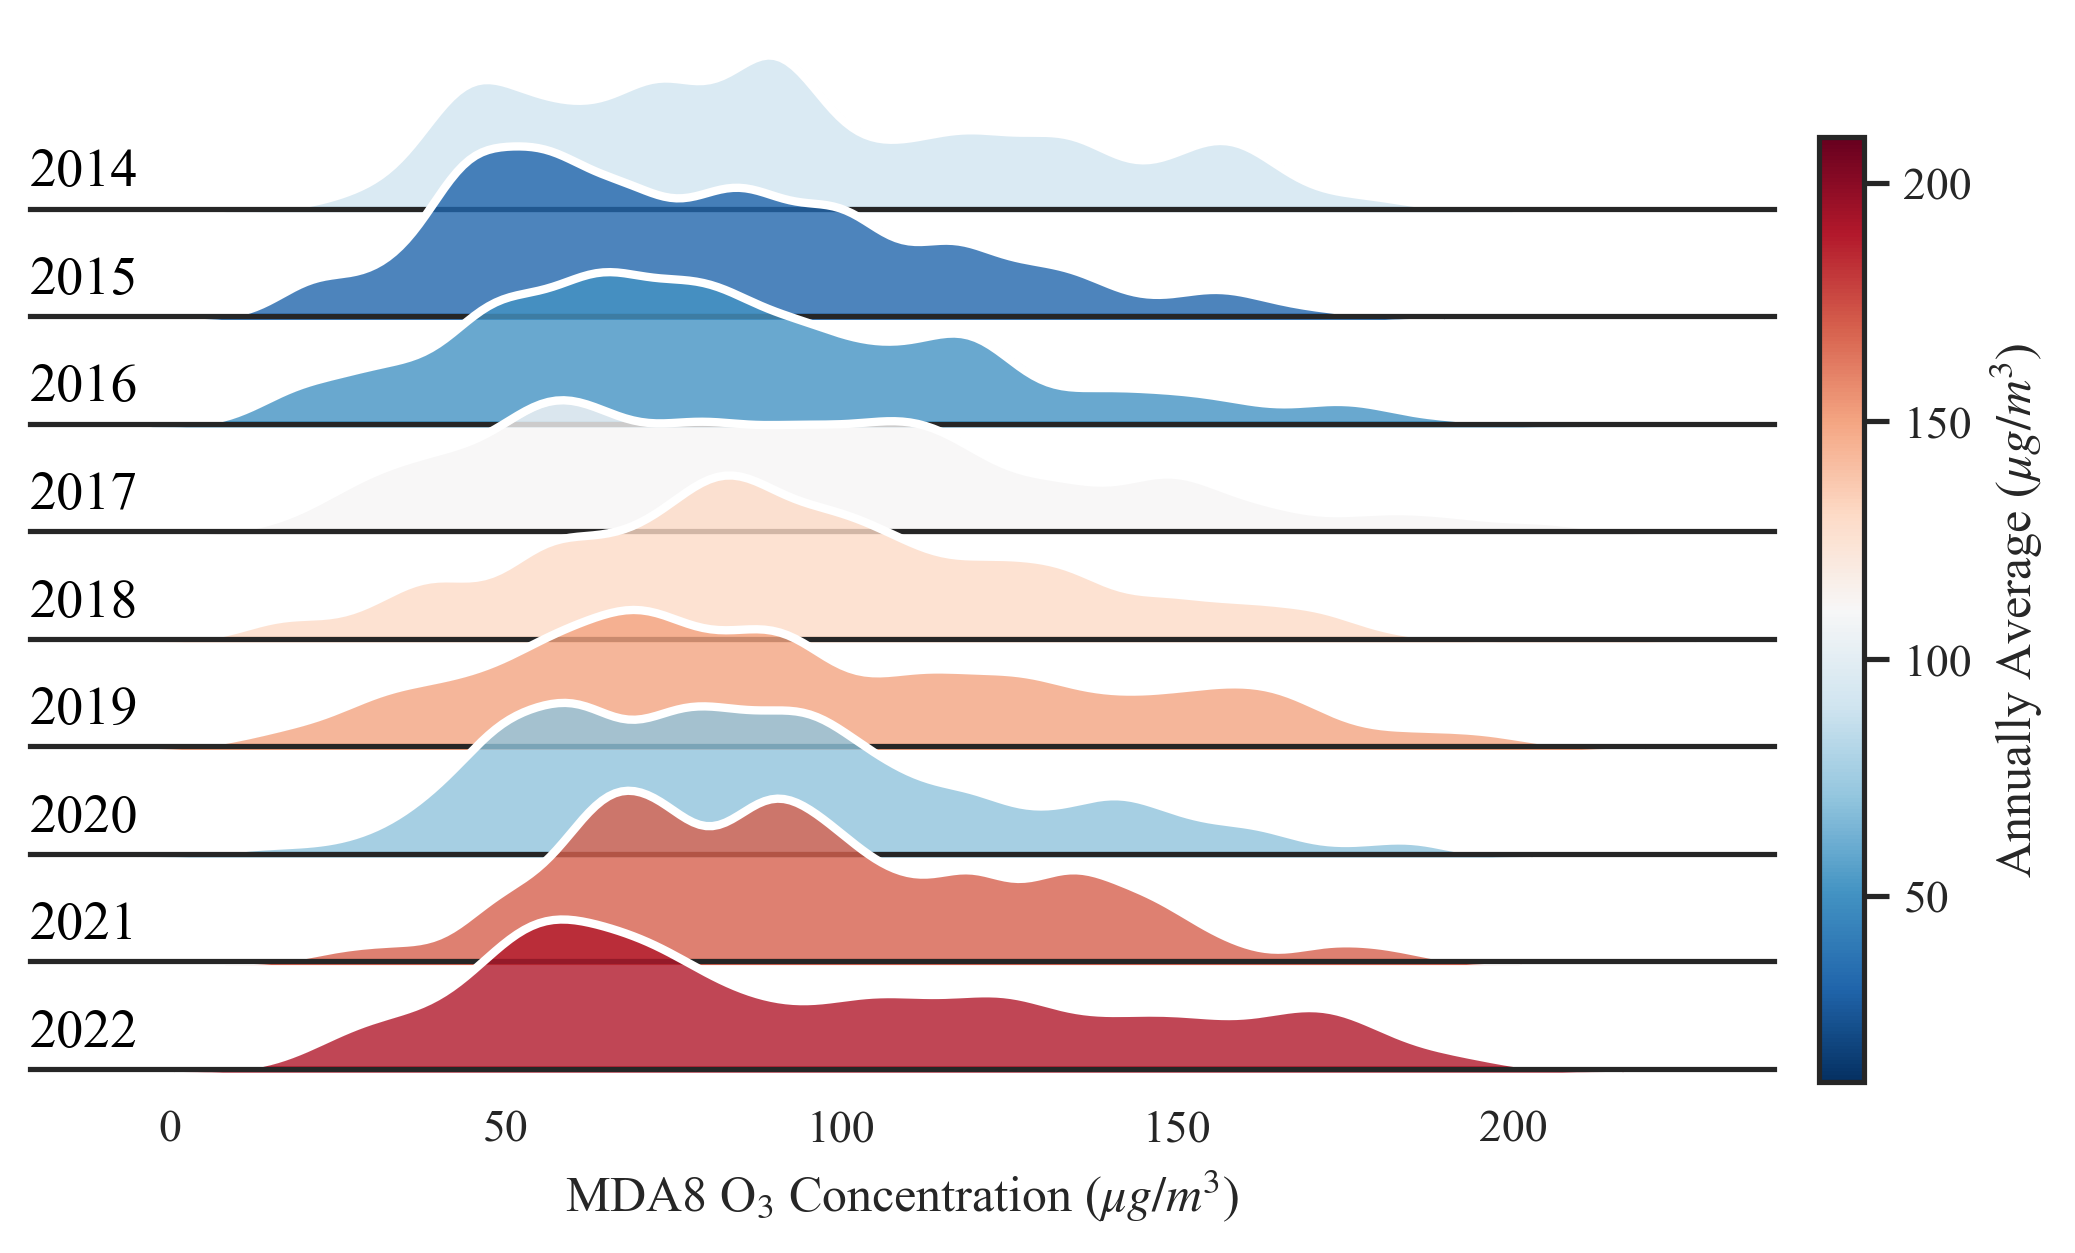

In [10]:
# 设置样式
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font='Times New Roman')
plt.rcParams['figure.dpi'] = 300
usepalette = 'RdBu_r'

# 指定颜色顺序
hue_order = mda8_df.groupby('year')['avg'].mean().sort_values(ascending=True).index

# 创建 FacetGrid
grid = sns.FacetGrid(mda8_df, row='year', hue='year', height=0.5, 
                     aspect=15, palette=usepalette, hue_order=hue_order)

# 绘制山脊图
grid.map(sns.kdeplot, "avg", bw_adjust=0.5, clip_on=False, 
         shade=True, alpha=0.8, linewidth=1.5)
grid.map(sns.kdeplot, "avg", clip_on=False, color="w", lw=2, bw_adjust=0.5)

# 添加标签
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

grid.map(label, "year")
grid.set(yticks=[])
grid.set(xlabel='MDA8 O$_3$ Concentration ($\mu$$g/m$$^3$)')
grid.set_titles('')
grid.set_ylabels('')
grid.despine(left=True)

# 创建颜色条
# fig, ax = plt.subplots()
cax = grid.fig.add_axes([0.92, 0.1, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap=usepalette)
sm.set_array(mda8['avg'])  # 设置颜色映射的值范围
cbar = plt.colorbar(sm, cax=cax)
cbar.set_ticks(np.arange(50,201,50))
cbar.set_label('Annually Average ($\mu$$g/m$$^3$)')
# cbar.ax.set_title('Annual Average')
# 显示图形
plt.subplots_adjust(hspace=-0.4)
plt.show()


## 九月

In [10]:
df_sep   = pd.read_excel(path + 'O3_years_sep.xlsx',index_col=0)
mda8_sep = df_sep.rolling(8).mean().resample('D').max()
mda8_sep.dropna(inplace=True)
mda8_sep['year'] = mda8_sep.index.year
mda8_sep

,avg,year
datetime,,
2014-09-01,60.875000,2014
2014-09-02,100.013889,2014
2014-09-03,119.361111,2014
2014-09-04,139.000000,2014
2014-09-05,136.972222,2014
...,...,...
2022-09-26,180.138889,2022
2022-09-27,175.305556,2022
2022-09-28,106.152778,2022


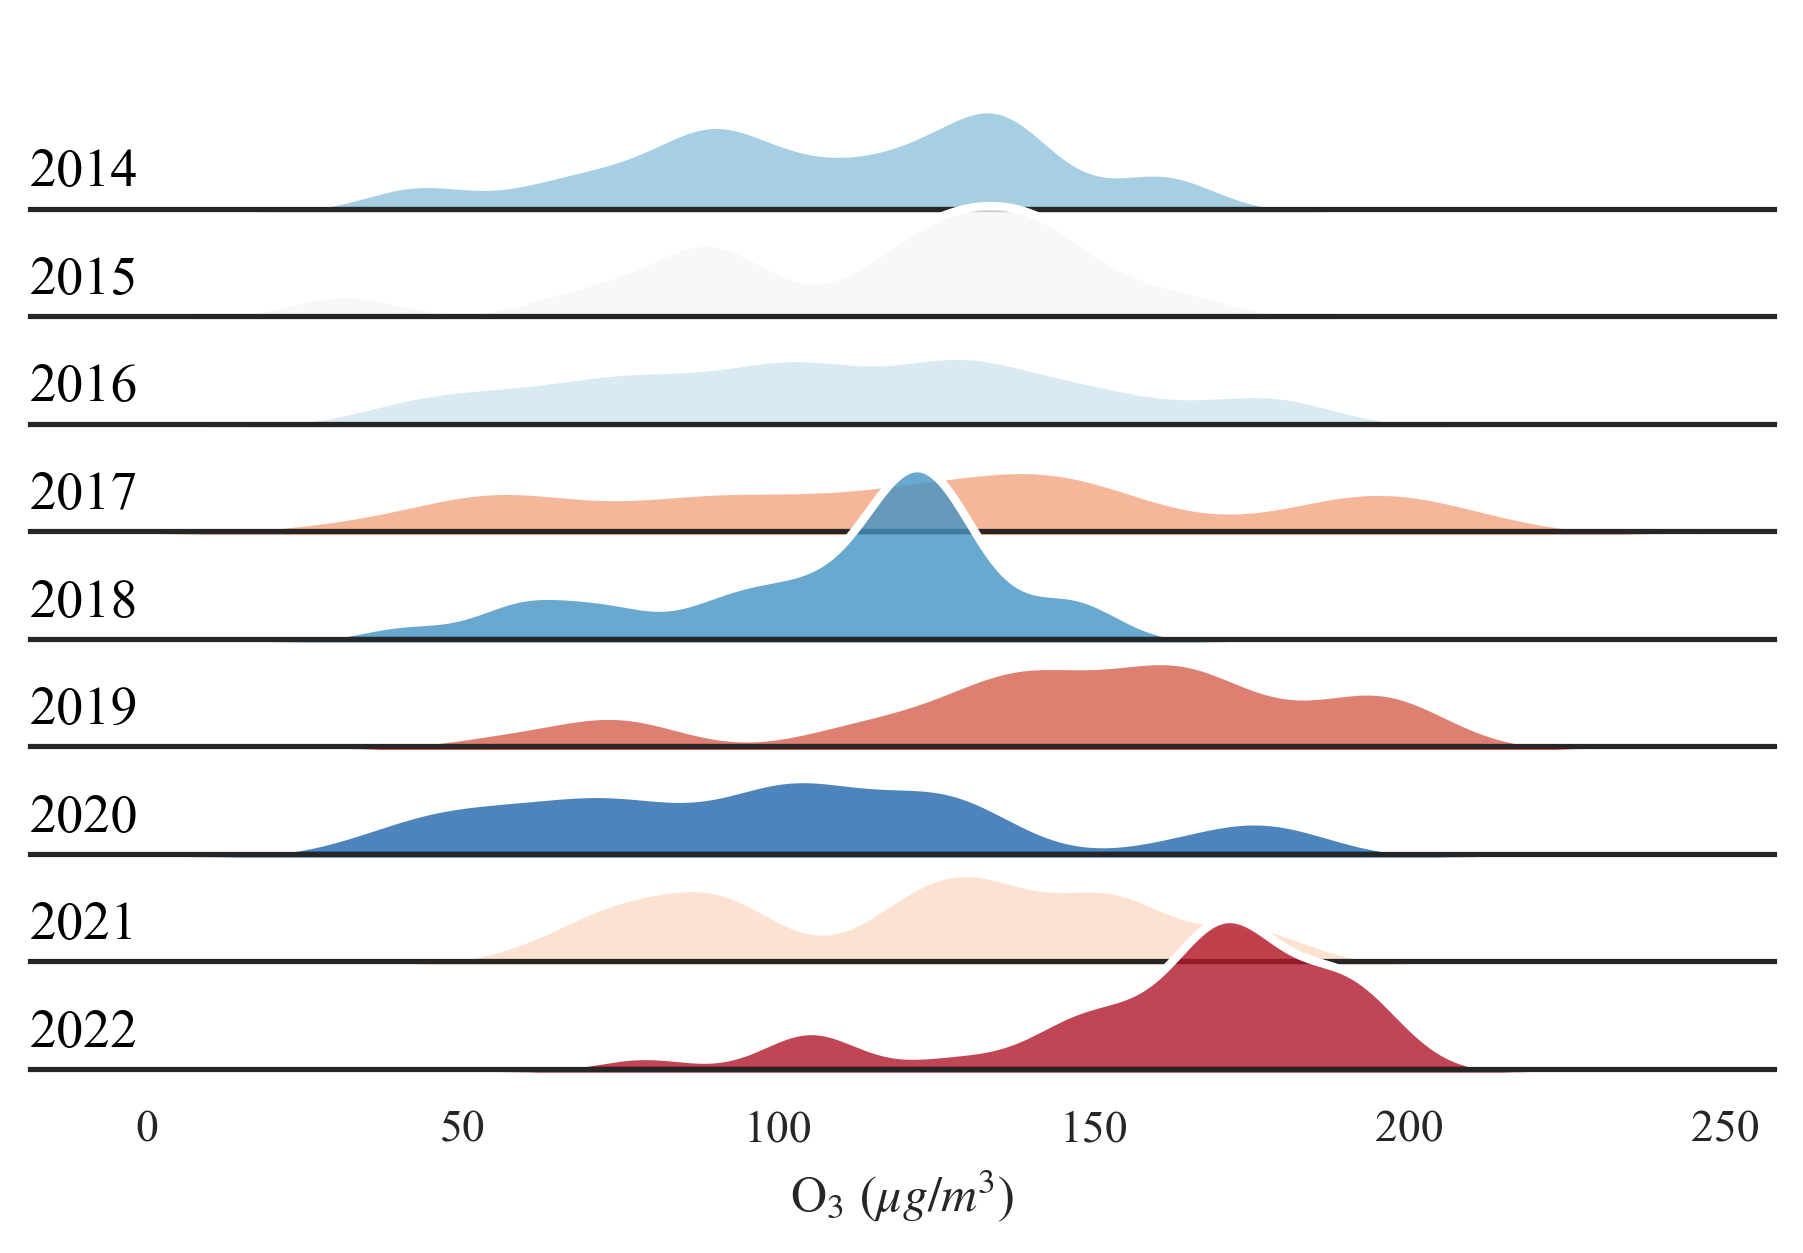

In [11]:
# 设置样式
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font='Times New Roman')
plt.rcParams['figure.dpi'] = 300
usepalette = 'RdBu'

# 指定颜色顺序
hue_order = mda8_sep.groupby('year')['avg'].mean().sort_values(ascending=False).index

# 创建 FacetGrid
grid = sns.FacetGrid(mda8_sep, row='year', hue='year', height=0.5, aspect=15, palette=usepalette, hue_order=hue_order)

# 绘制山脊图
grid.map(sns.kdeplot, "avg", bw_adjust=0.5, clip_on=False, shade=True, alpha=0.8, linewidth=1.5)
grid.map(sns.kdeplot, "avg", clip_on=False, color="w", lw=2, bw_adjust=0.5)

# 添加标签
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

grid.map(label, "year")
grid.set(yticks=[])
grid.set(xlabel='O$_3$ ($\mu$$g/m$$^3$)')
grid.set_titles('')
grid.set_ylabels('')
grid.despine(left=True)
# 显示图形
plt.subplots_adjust(hspace=-0.4)
plt.show()
